In [100]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [101]:
df = pd.read_csv("final_train.csv")



In [102]:
df.head(10)

,Unnamed: 0,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
5,5,SITTING,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0
6,6,LAYING,-1.544632,-0.082690,-2.383599,-1.850232,-0.134514,1.509522,4.287757,-11.804038,...,5.060741,1.503260,5.408900,-6.020885,3.316649,-0.944660,-1.035018,3.412909,2.096713,1.0
7,7,STANDING,-1.567323,-0.857850,-2.490082,-1.832982,0.112276,-0.738710,7.961757,-9.302665,...,5.060179,2.089889,5.362029,-0.555530,3.272104,-0.942724,-1.030745,-2.238799,2.010097,1.0
8,8,LAYING,-1.548536,-0.085978,-2.385792,-1.802245,0.152624,1.059657,6.577405,-6.372738,...,5.058368,2.487948,5.247866,-6.149970,3.259964,-0.938109,-1.017701,3.282303,1.968382,1.0
9,9,WALKING_DOWNSTAIRS,-1.574517,-0.779927,-2.460828,-1.826485,-0.089204,1.763456,2.010612,-6.150281,...,4.289583,4.563102,2.775124,-3.942224,1.031420,-0.802131,-0.704161,0.571339,-2.101442,2.0


In [103]:
list(df.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 

In [104]:
#Check for duplicates
print("Before dropping duplicates: " + str(len(df)))
df.drop_duplicates(keep='first',inplace=True)
print("After dropping duplicates: " + str(len(df)))



Before dropping duplicates: 11086
After dropping duplicates: 11086


In [105]:
#Drop columns containing index and subject
# Index doesn't carry any information with it
# Subject is a parameter that should not take part in the learning process
df = df.drop(columns=['Unnamed: 0','subject'])

In [106]:
#Look for NaNs per column
for column in df.columns:
    print(column+": "  + str(df[column].isna().sum()))
    

Activity: 0
angle(X,gravityMean): 57
angle(Y,gravityMean): 68
angle(Z,gravityMean): 60
angle(tBodyAccJerkMean),gravityMean): 52
angle(tBodyAccMean,gravity): 52
angle(tBodyGyroJerkMean,gravityMean): 57
angle(tBodyGyroMean,gravityMean): 56
energy-mean(): 60
fBodyAcc-bandsEnergy()-1,16: 51
fBodyAcc-bandsEnergy()-1,16.1: 59
fBodyAcc-bandsEnergy()-1,16.2: 52
fBodyAcc-bandsEnergy()-1,24: 50
fBodyAcc-bandsEnergy()-1,24.1: 59
fBodyAcc-bandsEnergy()-1,24.2: 57
fBodyAcc-bandsEnergy()-1,8: 49
fBodyAcc-bandsEnergy()-1,8.1: 64
fBodyAcc-bandsEnergy()-1,8.2: 56
fBodyAcc-bandsEnergy()-17,24: 60
fBodyAcc-bandsEnergy()-17,24.1: 59
fBodyAcc-bandsEnergy()-17,24.2: 44
fBodyAcc-bandsEnergy()-17,32: 54
fBodyAcc-bandsEnergy()-17,32.1: 57
fBodyAcc-bandsEnergy()-17,32.2: 43
fBodyAcc-bandsEnergy()-25,32: 56
fBodyAcc-bandsEnergy()-25,32.1: 56
fBodyAcc-bandsEnergy()-25,32.2: 60
fBodyAcc-bandsEnergy()-25,48: 60
fBodyAcc-bandsEnergy()-25,48.1: 55
fBodyAcc-bandsEnergy()-25,48.2: 57
fBodyAcc-bandsEnergy()-33,40: 50
fB

fBodyGyro-mean()-X: 55
fBodyGyro-mean()-Y: 58
fBodyGyro-mean()-Z: 68
fBodyGyro-meanFreq()-X: 53
fBodyGyro-meanFreq()-Y: 50
fBodyGyro-meanFreq()-Z: 62
fBodyGyro-min()-X: 61
fBodyGyro-min()-Y: 64
fBodyGyro-min()-Z: 69
fBodyGyro-skewness()-X: 69
fBodyGyro-skewness()-Y: 63
fBodyGyro-skewness()-Z: 62
fBodyGyro-sma(): 65
fBodyGyro-std()-X: 51
fBodyGyro-std()-Y: 59
fBodyGyro-std()-Z: 50
shadow-gravity-angle(): 56
tBodyAcc-arCoeff()-X,1: 64
tBodyAcc-arCoeff()-X,2: 53
tBodyAcc-arCoeff()-X,3: 53
tBodyAcc-arCoeff()-X,4: 71
tBodyAcc-arCoeff()-Y,1: 53
tBodyAcc-arCoeff()-Y,2: 53
tBodyAcc-arCoeff()-Y,3: 69
tBodyAcc-arCoeff()-Y,4: 67
tBodyAcc-arCoeff()-Z,1: 76
tBodyAcc-arCoeff()-Z,2: 57
tBodyAcc-arCoeff()-Z,3: 51
tBodyAcc-arCoeff()-Z,4: 69
tBodyAcc-correlation()-X,Y: 67
tBodyAcc-correlation()-X,Z: 49
tBodyAcc-correlation()-Y,Z: 57
tBodyAcc-energy()-X: 57
tBodyAcc-energy()-Y: 59
tBodyAcc-energy()-Z: 60
tBodyAcc-entropy()-X: 62
tBodyAcc-entropy()-Y: 46
tBodyAcc-entropy()-Z: 61
tBodyAcc-iqr()-X: 44
tBody

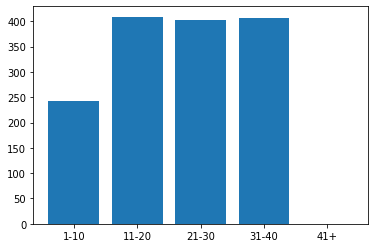

In [107]:
#Look for NaNs per row
nans_per_row = [df.loc[[index]].isna().sum().sum() for index in range(len(df))]

def get_nan_count_buckets(nans):
    buckets = {'1-10':0,'11-20':0,'21-30':0,'31-40':0,'41+':0}
    for index in range(len(nans)):
        if nans[index] >40:
            buckets['41-50'] = buckets.get('41+',0)+1
        elif nans[index] >30:
            buckets['31-40'] = buckets.get('31-40',0)+1
        elif nans[index] >20:
            buckets['21-30'] = buckets.get('21-30',0)+1
        elif nans[index] >10:
            buckets['11-20'] = buckets.get('11-20',0)+1
        elif nans[index] >1:
            buckets['1-10'] = buckets.get('1-10',0)+1
    return buckets

nans_grouped = get_nan_count_buckets(nans_per_row)
plt.bar(*zip(*nans_grouped.items()))
plt.show()
        


In [108]:
# There are a lot of rows with over 20 NaNs. Let's drop em.
to_drop = [index for index in range(len(nans_per_row)) if nans_per_row[index] > 20]
print(to_drop[:10])
df = df.drop(df.index[to_drop])
print(df.info())

# The rest of the NaNs will be replaced with mean values
to_impute = df.iloc[:,1:]
Y = df.iloc[:,0]
    
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
to_impute = imp_median.fit_transform(to_impute)
df.loc[:,1:] = to_impute

[33, 89, 92, 105, 123, 132, 143, 170, 178, 180]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10276 entries, 0 to 11085
Columns: 571 entries, Activity to void()
dtypes: float64(570), object(1)
memory usage: 44.8+ MB
None


In [109]:
df.head(10)

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,-1.865239,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
5,SITTING,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,3.611319,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0
6,LAYING,-1.544632,-0.082690,-2.383599,-1.850232,-0.134514,1.509522,4.287757,-11.804038,3.624044,...,5.060741,1.503260,5.408900,-6.020885,3.316649,-0.944660,-1.035018,3.412909,2.096713,1.0
7,STANDING,-1.567323,-0.857850,-2.490082,-1.832982,0.112276,-0.738710,7.961757,-9.302665,3.623865,...,5.060179,2.089889,5.362029,-0.555530,3.272104,-0.942724,-1.030745,-2.238799,2.010097,1.0
8,LAYING,-1.548536,-0.085978,-2.385792,-1.802245,0.152624,1.059657,6.577405,-6.372738,3.615428,...,5.058368,2.487948,5.247866,-6.149970,3.259964,-0.938109,-1.017701,3.282303,1.968382,1.0
9,WALKING_DOWNSTAIRS,-1.574517,-0.779927,-2.460828,-1.826485,-0.089204,1.763456,2.010612,-6.150281,1.208534,...,4.289583,4.563102,2.775124,-3.942224,1.031420,-0.802131,-0.704161,0.571339,-2.101442,2.0
